In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
sns.set_style('darkgrid')


# Import libraries
!pip install contractions
!pip install emoji
import pandas as pd
import numpy as np
import torch
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
import re
import emoji
import contractions
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import  Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import torch
nltk.download('stopwords')

     ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/289.9 kB 1.4 MB/s eta 0:00:01
     ------------ -------------------------- 92.2/289.9 kB 1.3 MB/s eta 0:00:01
     --------------- -------------------- 122.9/289.9 kB 901.1 kB/s eta 0:00:01
     ---------------------- --------------- 174.1/289.9 kB 1.2 MB/s eta 0:00:01
     --------------------------- -------- 225.3/289.9 kB 986.4 kB/s eta 0:00:01
     -------------------------------------- 289.9/289.9 kB 1.2 MB/s eta 0:00:00


     ---------------------------------------- 0.0/586.9 kB ? eta -:--:--
     - ----------------------------------- 20.5/586.9 kB 640.0 kB/s eta 0:00:01
     --- --------------------------------- 61.4/586.9 kB 812.7 kB/s eta 0:00:01
     ----- ------------------------------- 92.2/586.9 kB 871.5 kB/s eta 0:00:01
     -------- --------------------------- 143.4/586.9 kB 944.1 kB/s eta 0:00:01
     ----------- ------------------------ 184.3/586.9 kB 926.0 kB/s eta 0:00:01
     ---------------- --------------------- 256.0/586.9 kB 1.1 MB/s eta 0:00:01
     ---------------- --------------------- 256.0/586.9 kB 1.1 MB/s eta 0:00:01
     --------------------------- ---------- 419.8/586.9 kB 1.3 MB/s eta 0:00:01
     ------------------------------ ------- 471.0/586.9 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------ 481.3/586.9 kB 1.2 MB/s eta 0:00:01
     ----------------------------------- -- 553.0/586.9 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 586

ModuleNotFoundError: No module named 'torch'

In [3]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# 2. Preparing the data

In [2]:
df_review = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df_review.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# Duplicates Removal

In [7]:
# Check for duplicates
df_review[df_review['sentiment'].duplicated()]

,review,sentiment
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
# Check number of duplicates
print(f'Number of Duplicates')
print(len(df_review[df_review.duplicated()]))

Number of Duplicates
418


In [3]:
# Remove duplicates
df_review = df_review[~df_review.duplicated()]

In [10]:
# Inspect changes
print(len(df_review[df_review.duplicated()]))

0


# Data Visualization

In [11]:
df_positive = df_review[df_review['sentiment']=='positive']
df_negative = df_review[df_review['sentiment']=='negative']

In [1]:
colors = sns.color_palette('deep')

plt.figure(figsize=(4,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.show()

NameError: name 'sns' is not defined

# Data Cleaning


In [13]:
import nltk

# Download the 'punkt' resource before calling word_tokenize
nltk.download('punkt')

import spacy

nlp = spacy.load('en_core_web_sm')
stopwords_list = stopwords.words('english')

# Define function to clear data
def clean(text):
    # Decode emojis
    text = emoji.demojize(text)
    # Decode contractions
    text = contractions.fix(text)
    # Remove web links and html tags
    text = re.sub(r'https?://(www\.)?[\w-]+(\.[a-zA-Z]+)+|<.*?>|[^a-zA-Z\s]', ' ', text)
    # Remove whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lower
    text = text.lower()
    # Convert text to tokens
    tokens = word_tokenize(text)
    # Remove stopwords and words longer than 1
    tokens = [word for word in tokens if word not in stopwords_list and len(word) > 1]
    words = nlp(" ".join(tokens))
    text = [word.lemma_ for word in words]
    return ' '.join(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df_review['review'] = df_review['review'].apply(clean)

<ipython-input-14-7384615a98c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['review'] = df_review['review'].apply(clean)


In [15]:
df_review

,review,sentiment
0,one reviewer mention watch oz episode hook rig...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive
...,...,...
49995,think movie right good job creative original f...,positive
49996,bad plot bad dialogue bad act idiotic direct a...,negative
49997,catholic teach parochial elementary school nun...,negative
49998,go disagree previous comment side maltin one s...,negative


In [16]:
#save df_review
df_review.to_csv('df_review_cleaned.csv', index=False)

In [4]:
df_review = pd.read_csv('/content/drive/MyDrive/df_review_cleaned.csv')

# EDA

In [17]:
# function to count every unique word
def count_words(data):
    words_counts = []
    for text in tqdm(data):
        words = word_tokenize(text)
        words_counts.extend(words)
    return Counter(words_counts).most_common()

In [18]:
df_positive2 = df_review[df_review['sentiment']=='positive']
df_negative2 = df_review[df_review['sentiment']=='negative']

In [19]:
positive_words_count = pd.DataFrame(count_words(df_positive2['review']), columns=['Words', 'Count'])
negative_words_count = pd.DataFrame(count_words(df_negative2['review']), columns=['Words', 'Count'])

100%|██████████| 24698/24698 [00:12<00:00, 1944.00it/s]


# Plot top 10 most frequent words in negative sentiment

In [20]:
px.bar(data_frame=negative_words_count[:10], x='Words', y='Count', title='Negative Words Frequency', color='Words')

# Plot top 10 most frequent words in positive sentiment

In [21]:
px.bar(data_frame=positive_words_count[:10], x='Words', y='Count', title='Positive Word Frequency', color='Words')

# WordCloud

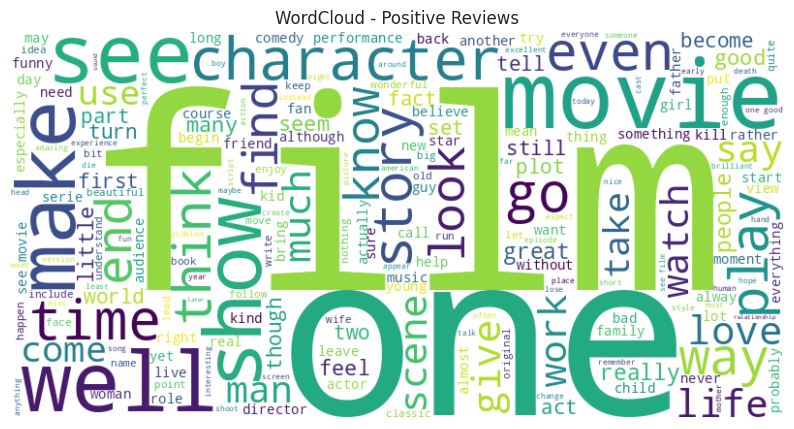

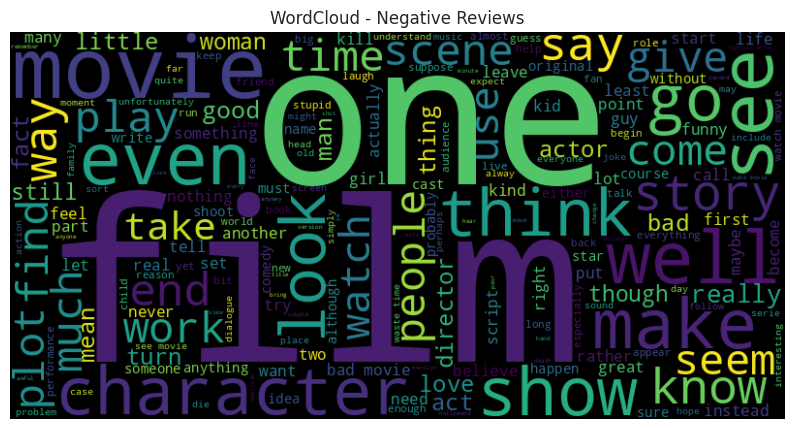

In [22]:
from wordcloud import WordCloud

positive_reviews = " ".join(df_review[df_review['sentiment'] == 'positive']['review'].values)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positive Reviews')
plt.show()

# WordCloud for negative reviews
negative_reviews = " ".join(df_review[df_review['sentiment'] == 'negative']['review'].values)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negative Reviews')
plt.show()



## Splitting data into train and test set


In [5]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review,test_size =0.3,random_state=42)

In [6]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [7]:
train_y.value_counts()

,count
sentiment,
positive,17413
negative,17294



# 3.Text Representation (TF-IDF)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

the TfidfVectorizer generates a matrix where each row represents a document, and each column represents a term (word). Most documents contain only a small subset of the total vocabulary, so most of the entries in this matrix are zeros. To save memory, this matrix is stored in a compressed format called a sparse matrix, which only records the non-zero entries.

In [9]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,aa,aaa,aaaaaaaaaaaahhhhhhhhhhhhhh,aaaaaaaargh,aaaaaaah,aaaaaaahhhhhhggg,aaaaagh,aaaaah,aaaaahhhh,aaaaatch,...,zzzz,zzzzz,zzzzzzzz,zzzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
8966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



##  Support Vector Machine(SVM)


# This Model takes too long to run so we run it independently then run the other models after it.

In [25]:
# from sklearn.svm import SVC
# svc = SVC(kernel='linear')
# svc.fit(train_x_vector, train_y)

In [26]:
import pickle
svc= pickle.load(open('/content/drive/MyDrive/svc_model.pkl', 'rb'))

In [27]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']



## Decision Tree


In [10]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()


## Logistic Regression


In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

LogisticRegression()

# XGB

In [15]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_y_encoded = le.fit_transform(train_y)

XGB = XGBClassifier()

XGB.fit(train_x_vector, train_y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


# 5. Model Evaluation


## Mean Accuracy

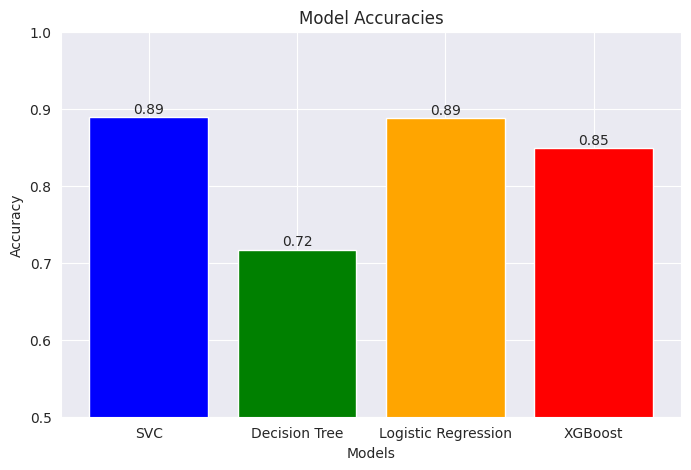

In [21]:
le = LabelEncoder()
le.fit(train_y)
test_y_encoded = le.transform(test_y)

accuracies = {
    'SVC': svc.score(test_x_vector, test_y),
    'Decision Tree': dec_tree.score(test_x_vector, test_y),
    'Logistic Regression': log_reg.score(test_x_vector, test_y),
    'XGBoost': XGB.score(test_x_vector, test_y_encoded)
}


models = list(accuracies.keys())
scores = list(accuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0.5, 1.0])
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Models')

for i, v in enumerate(scores):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')

plt.show()

# F1-Score

In [22]:
from sklearn.metrics import f1_score

f1_score(test_y,svc.predict(test_x_vector),
          labels = ['positive','negative'],average=None)

array([0.89066631, 0.88688278])

## Classification report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.88      0.90      0.89      7471
    negative       0.90      0.88      0.89      7404

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



# Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = ['positive', 'negative'])
conf_mat

array([[6737,  734],
       [ 920, 6484]])


# 6. Tuning the Model


## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
#set the parameters
params = {'C': [1,4,8,16,32], 'kernel' : ['linear','rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,params, cv = 5)
svc_grid.fit(train_x_vector, train_y)

In [ ]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

In [ ]:
import pickle

# Save the model
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(svc, file)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

So Above obtained paramters and kernel are the best for our model to obtain desired results as accurate as possible